# DBSCAN
DBSCAN is another clustering algorithm. Some people even claim it is the most frequently used algorithm, but that cup probably goes to k-Means...

### The Data

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x432 with 0 Axes>

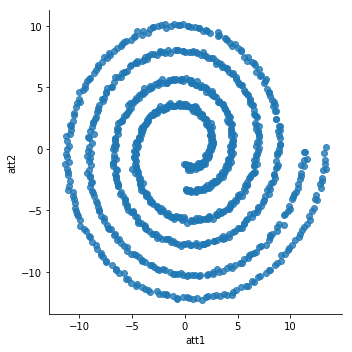

In [4]:
df = pd.read_csv('./data/spiral_clusters.csv')
plt.figure(figsize=(6,6))
sns.lmplot(data=df, x='att1', y='att2', fit_reg=False);

# First shot: k-Means
Do you think this will work?

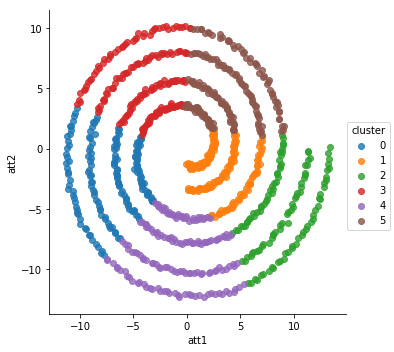

In [5]:
from sklearn.cluster import KMeans

km = KMeans(6)
km.fit(df[['att1','att2']])
plt_df = df.copy()
plt_df['cluster'] = km.labels_
sns.lmplot(data=plt_df, x='att1', y='att2', hue='cluster', fit_reg=False);

# Let's try DBSCAN instead

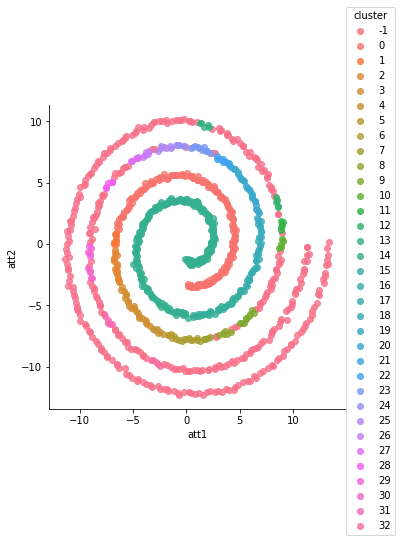

In [4]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
db.fit(df[['att1', 'att2']])
plt_df = df.copy()
plt_df['cluster'] = db.labels_
sns.lmplot(data=plt_df, x='att1', y='att2', hue='cluster', fit_reg=False);

## Understanding DBSCAN
Well, this looks a little better, but still not perfect. Maybe we should understand DBSCAN first...

- DBSCAN puts datapoints into one cluster, if they can *reach* each other
- it has two parameters:
  - $\epsilon$
  - *n*
- a datapoint $a$ is *directly reachable* by another datapoint $b$, if $|a-b| < \epsilon$
- now a *core point* is a datapoint that can directly reach at least $n$ other points
- a datapoint $a$ is *reachable* by point $b$ if there is a path $b -> c_1 -> .. -> c_k -> a$ of direct reachability
- all networks of core points that can reach each other form a cluster
- data points that are not core points, but directly reachable by a core point, are also part of the cluster
- all other data points are *outliers*

computational complexity:
- $O(n \log n)$ average
- $O(n^2)$ worst case

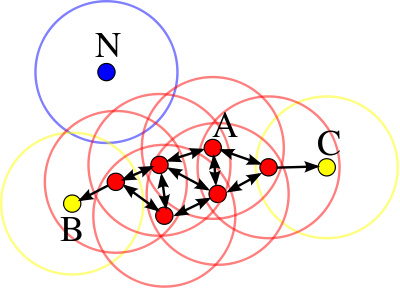
*(image source: Wikipedia)*

In the graphics above, the red points are core points and form a cluster, yellow ones are part of the cluster, but are border points, and blue is an outlier.

# Exercise
- cluster the spiral data using DBSCAN. Find sensible parameters
- ctor signature: `DBSCAN.__init__(eps, min_samples)`
- explain how you came up with the chosen parameters
- is it possible to use the Silhoutte Coefficient or Calinsky-Harabaz with DBSCAN?

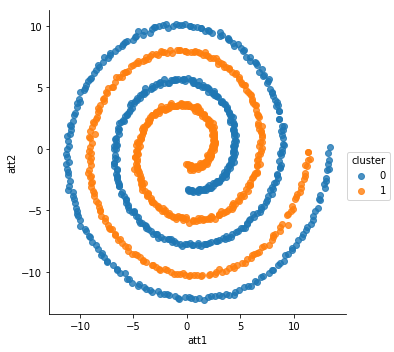

In [12]:
from sklearn.cluster import DBSCAN

from sklearn.model_selection import GridSearchCV

db = DBSCAN(eps=0.8, min_samples=3)
db.fit(df[['att1', 'att2']],)
plt_df = df.copy()
plt_df['cluster'] = db.labels_
sns.lmplot(data=plt_df, x='att1', y='att2', hue='cluster', fit_reg=False);


# your code here...
# (you can use the previous code cell as a starting point -- just fill in parameters for the DBSCAN constructor)


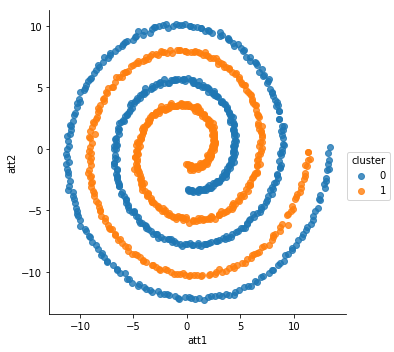

In [6]:
#
#
#
# Solution below....
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
db = DBSCAN(eps=1.2, min_samples=3)
db.fit(df[['att1', 'att2']])
plt_df = df.copy()
plt_df['cluster'] = db.labels_
sns.lmplot(data=plt_df, x='att1', y='att2', hue='cluster', fit_reg=False);

# Outlier Detection with DBSCAN
- Data points that are not reachable by any core datapoint are outliers.
- they are assigned to cluster $-1$

## Let's make some noise...
For training purposes, we add some random noise to the data.

We would like to detect them later as outliers.

In [18]:
import numpy as np
r = np.random.rand(50,2) * 24 - 12
r = pd.DataFrame(r, columns=['att1', 'att2'])
r['noise'] = 1
noisy_df = df.copy()
noisy_df['noise'] = 0
noisy_df = pd.concat([noisy_df, r])
noisy_df.sample(10)

,att1,att2,label,noise
485,12.001434,-5.091028,spiral1,0
22,-8.579123,0.443637,NaN,1
487,12.475586,-4.127716,spiral1,0
327,1.358719,9.861942,spiral1,0
944,0.191513,-10.306148,spiral2,0
931,-3.304503,-9.467665,spiral2,0
448,1.603437,-12.297543,spiral1,0
577,2.362818,1.735254,spiral2,0
53,4.297306,-0.187395,spiral1,0
17,1.575691,-3.259721,spiral1,0


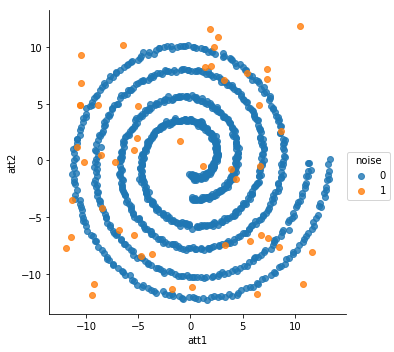

In [19]:
sns.lmplot(data=noisy_df, x='att1', y='att2', hue='noise', fit_reg=False);

# Exercise
The dataset `noisy_df` contains some noise.
1. Tune DBSCAN such that it detects outliers.
1. you can test the performance by using the `noise` column
1. can you use k-Means for outlier detection?

*Hint*: what is the difference to the previous exercise?
  - you do not need to find the two spiral clusters, just detect outliers!


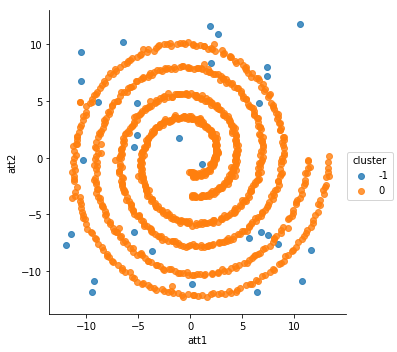

In [36]:
from sklearn.cluster import DBSCAN

# Tune parameters here...
# (you do not need to find the spiral clusters, just  identify outliers)
db = DBSCAN(eps=.55, min_samples=2)

db.fit(noisy_df[['att1', 'att2']])

plt_df = noisy_df.copy()

# For plotting, map all clusters apart from '-1' (=outliers) to 0
preds = [-1 if l == -1 else 0 for l in db.labels_]
plt_df['cluster'] = preds
sns.lmplot(data=plt_df, x='att1', y='att2', hue='cluster', fit_reg=False);

### Apply scoring function

In [37]:
from sklearn.metrics import classification_report

preds = [1 if l == -1 else 0 for l in db.labels_]
print(classification_report(preds, noisy_df.noise.values))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      1019
          1       0.62      1.00      0.77        31

avg / total       0.99      0.98      0.98      1050

